# Measuring J0600 flux from LCO images

M Kenworthy // Leiden Observatory // kenworthy@strw.leidenuniv.nl

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits

## Josch's reference stars

Ok I have uploaded the last nights data from ROAD to AAVSO.
I use as Reference star:
UCAC4 296-008893
and as check star:
UCAC4 296-009008


In [2]:
def find_min(xobj,yobj, xlist, ylist):
    'find the index of the star closest to position xobj, yobj'
    dr = (xlist-xobj)**2 + (ylist-yobj)**2
    # find min dr 
    ind = np.argmin(dr)
    print(np.sqrt(dr[ind]))
    return ind


In [3]:
from astropy.table import Table
from pathlib import Path

# output table
t = Table(data=None,names=('MJD','gmag','gmag_err','filter','obs'),dtype=('f','f','f','str','str'))

for imname in Path('./').rglob('*e91.fits.fz'):

    hdu1 = fits.open(imname)
    print('processing: ',imname)

    image = hdu1['SCI'].data
    mask = hdu1['BPM'].data
    phot = hdu1['CAT'].data

    imh = hdu1['SCI'].header
    print(imh['FILTER'])
    # FILTER == ip or gp 
    if imh['FILTER'] != 'gp':
        print('it is not a gp image - skipping this file...')
        continue
        
    epoch = imh['MJD-OBS']
    print('{:.5f} MJD'.format(epoch))

    # get the WCS for the frame

    from astropy import wcs
    # Parse the WCS keywords in the primary HDU
    w = wcs.WCS(hdu1['SCI'].header)

    # Print out the "name" of the WCS, as defined in the FITS header
    print(w.wcs.name)

        # Print out all of the settings that were parsed from the header
    w.wcs.print_contents()

    # star coords in pix
    star_crd = w.wcs_world2pix([[90.0033, -31.0076]], 0) # star
    print(star_crd)
    # RA
    #90.0033 (06:00:00.792)
    #Dec
    #-31.0076 (-31:00:27.36)
    #Epoch
    #2000

    # reference star UC4 296-009008
    refe_crd = w.wcs_world2pix([[90.1409130, -30.9974700]], 0) # 296-009008
    #print(refe_crd)

    star_arg = find_min(star_crd[0][0], star_crd[0][1], phot['x'], phot['y'])
    #print(star_arg)
    refe_arg = find_min(refe_crd[0][0], refe_crd[0][1], phot['x'], phot['y'])
    #print(refe_arg)

    targflux = phot['flux'][star_arg]
    targfluxerr = phot['fluxerr'][star_arg]
    refflux = phot['flux'][refe_arg]
    reffluxerr = phot['fluxerr'][refe_arg]

    print('star flux is {:.1f} +- {:.1f}'.format(targflux, targfluxerr))
    print('refe flux is {:.1f} +- {:.1f}'.format(refflux, reffluxerr))

    dm = -2.5 * np.log10(targflux/refflux)
    dmerr = np.sqrt( (targfluxerr/targflux)**2 + (reffluxerr/refflux)**2) * dm
    print()
    print('delta mag is {:.3f}+-{:.3f} mag'.format(dm, dmerr))
    t.add_row([epoch,dm,dmerr,imh['FILTER'],'M'])
    
t.sort('MJD')


processing:  coj1m011-fa12-20200109-0189-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  cpt1m013-fa14-20191227-0252-e91.fits.fz
gp
58844.95134 MJD

[[2039.04976212 2021.67099697]]
4.1815203937228045
4.327239988319192
star flux is 180143.9 +- 465.5
refe flux is 671588.2 +- 844.0

delta mag is 1.429+-0.004 mag
processing:  lsc1m004-fa03-20191229-0264-e91.fits.fz


Set OBSGEO-B to   -32.347341 from OBSGEO-[XYZ].
Set OBSGEO-H to     1756.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


gp
58847.27363 MJD

[[2041.54278104 2045.23010145]]
4.760904684923695
4.988698008925256
star flux is 145026.6 +- 404.1
refe flux is 545684.1 +- 752.5

delta mag is 1.439+-0.004 mag
processing:  cpt1m012-fa06-20191227-0061-e91.fits.fz


Set OBSGEO-B to   -30.167447 from OBSGEO-[XYZ].
Set OBSGEO-H to     2197.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


gp
58844.79258 MJD

[[2026.5978322  2051.74352505]]
4.375877343783355
4.385850827257644
star flux is 195421.8 +- 504.8
refe flux is 716648.4 +- 882.3

delta mag is 1.411+-0.004 mag
processing:  cpt1m013-fa14-20191229-0080-e91.fits.fz


Set OBSGEO-B to   -32.382900 from OBSGEO-[XYZ].
Set OBSGEO-H to     1691.993 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


gp
58846.85702 MJD

[[2100.02223581 1920.6298851 ]]
3.0152851794637656
1.4614548274603756
star flux is 168213.7 +- 433.0
refe flux is 664664.3 +- 828.0

delta mag is 1.492+-0.004 mag
processing:  lsc1m004-fa03-20200106-0153-e91.fits.fz
gp
58855.23368 MJD

[[2055.63592303 2048.55219877]]
4.700455152649974
4.956547629810944
star flux is 120262.5 +- 452.3
refe flux is 461290.5 +- 745.0

delta mag is 1.460+-0.006 mag
processing:  lsc1m004-fa03-20200106-0092-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  lsc1m004-fa03-20200111-0113-e91.fits.fz
gp
58860.13463 MJD

[[2044.46801897 2054.11815097]]
4.757287090993678
4.895176000273372
star flux is 140389.6 +- 520.0
refe flux is 539439.3 +- 826.0

delta mag is 1.462+-0.006 mag
processing:  cpt1m013-fa14-20200112-0074-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  coj1m011-fa12-20200111-0095-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  lsc1m004-fa03-20200106-0180-e91.f

Set OBSGEO-B to   -31.272933 from OBSGEO-[XYZ].
Set OBSGEO-H to     1164.993 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


gp
58851.14877 MJD

[[2031.32227948 2062.36492259]]
4.716534641178432
4.967354583488222
star flux is 123636.9 +- 390.3
refe flux is 572935.4 +- 777.9

delta mag is 1.665+-0.006 mag
processing:  lsc1m004-fa03-20191219-0084-e91.fits.fz
gp
58837.06578 MJD

[[2025.19841271 2052.95312983]]
4.3105062472774405
4.419688991779769
star flux is 69119.2 +- 316.9
refe flux is 290743.0 +- 568.8

delta mag is 1.560+-0.008 mag
processing:  cpt1m013-fa14-20191231-0092-e91.fits.fz
gp
58848.95354 MJD

[[2043.1496573 2018.2422241]]
4.225333841428988
4.5282955335573565
star flux is 138954.5 +- 425.4
refe flux is 655485.5 +- 838.0

delta mag is 1.684+-0.006 mag
processing:  cpt1m012-fa06-20191222-0062-e91.fits.fz
gp
58839.80877 MJD

[[2062.20562891 2044.50694742]]
4.503931450814933
4.575076124193507
star flux is 169838.5 +- 427.1
refe flux is 707771.8 +- 850.0

delta mag is 1.550+-0.004 mag
processing:  coj1m011-fa12-20200113-0079-e91.fits.fz
gp
58861.46879 MJD

[[2040.58059624 2042.32363183]]
4.55660603457

Set OBSGEO-B to   -30.167330 from OBSGEO-[XYZ].
Set OBSGEO-H to     2197.994 from OBSGEO-[XYZ]'. [astropy.wcs.wcs]


ip
it is not a gp image - skipping this file...
processing:  coj1m011-fa12-20200113-0120-e91.fits.fz
gp
58861.55211 MJD

[[2058.87600347 2040.75789344]]
4.385310151796038
4.617163481070164
star flux is 136289.3 +- 625.7
refe flux is 588301.2 +- 924.7

delta mag is 1.588+-0.008 mag
processing:  lsc1m004-fa03-20200111-0056-e91.fits.fz
gp
58860.05213 MJD

[[2070.80005002 2081.00769441]]
4.582534715273492
4.881849073609934
star flux is 143664.0 +- 499.2
refe flux is 549917.1 +- 811.8

delta mag is 1.457+-0.006 mag
processing:  lsc1m004-fa03-20200113-0117-e91.fits.fz
gp
58862.13525 MJD

[[2038.62411447 2052.93701153]]
4.805258665113369
5.026250314963711
star flux is 136121.7 +- 416.2
refe flux is 559021.3 +- 774.5

delta mag is 1.534+-0.005 mag
processing:  coj1m011-fa12-20200111-0061-e91.fits.fz
gp
58859.43720 MJD

[[2040.9639784  2042.79902122]]
4.471190483644518
4.639947595365142
star flux is 162691.9 +- 537.7
refe flux is 629368.4 +- 873.9

delta mag is 1.469+-0.005 mag
processing:  cpt

gp
58836.97187 MJD

[[2054.77624481 2030.31774173]]
4.153683206850989
4.387016440069651
star flux is 155977.1 +- 442.3
refe flux is 673645.9 +- 845.9

delta mag is 1.588+-0.005 mag
processing:  coj1m011-fa12-20191227-0293-e91.fits.fz
gp
58844.69565 MJD

[[2019.40023539 2033.98510034]]
4.088617009107686
4.250671195725438
star flux is 142046.5 +- 431.8
refe flux is 511126.7 +- 745.2

delta mag is 1.390+-0.005 mag
processing:  lsc1m004-fa03-20200103-0075-e91.fits.fz
gp
58852.06542 MJD

[[1990.11343106 1933.65367973]]
2.920468941101289
1.457607870193229
star flux is 125567.2 +- 397.4
refe flux is 556827.9 +- 769.3

delta mag is 1.617+-0.006 mag
processing:  lsc1m009-fa04-20200105-0077-e91.fits.fz
gp
58854.06617 MJD

[[2080.05794252 2061.89301693]]
4.240135923677977
4.490964470687307
star flux is 151498.3 +- 526.1
refe flux is 636325.7 +- 880.3

delta mag is 1.558+-0.006 mag
processing:  coj1m011-fa12-20200103-0091-e91.fits.fz
gp
58851.48199 MJD

[[2044.98613234 2045.33793022]]
4.1932903826

gp
58859.84362 MJD

[[2005.26977172 2093.48496298]]
4.173827281556743
4.432392284310937
star flux is 160177.7 +- 587.0
refe flux is 641307.9 +- 911.7

delta mag is 1.506+-0.006 mag
processing:  lsc1m004-fa03-20200107-0104-e91.fits.fz
gp
58856.09431 MJD

[[2064.058051   2068.46825595]]
4.580134402588876
4.795040403444116
star flux is 116012.2 +- 566.2
refe flux is 431323.1 +- 803.9

delta mag is 1.426+-0.007 mag
processing:  coj1m011-fa12-20191226-0117-e91.fits.fz
gp
58843.61195 MJD

[[2035.58173074 2050.61792248]]
4.350354477914092
4.501380794382989
star flux is 111585.6 +- 364.1
refe flux is 398000.5 +- 648.4

delta mag is 1.381+-0.005 mag
processing:  coj1m011-fa12-20200110-0061-e91.fits.fz
gp
58858.42981 MJD

[[2063.9304728  2028.70840494]]
4.340089689141794
4.530126765800091
star flux is 85368.7 +- 658.0
refe flux is 325200.4 +- 836.7

delta mag is 1.452+-0.012 mag
processing:  cpt1m012-fa06-20191221-0243-e91.fits.fz
gp
58839.05812 MJD

[[2024.93910087 2050.9102945 ]]
4.05434244829

gp
58850.81546 MJD

[[2012.06890323 2025.2186341 ]]
4.28174773726263
4.555913892164064
star flux is 138674.7 +- 442.1
refe flux is 620110.5 +- 825.2

delta mag is 1.626+-0.006 mag
processing:  coj1m011-fa12-20200108-0063-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  coj1m011-fa12-20200111-0096-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  coj1m011-fa12-20191220-0318-e91.fits.fz
gp
58837.64857 MJD

[[2050.04846052 2057.30539594]]
4.25579758312382
4.658352675721484
star flux is 115989.8 +- 368.6
refe flux is 476967.9 +- 706.5

delta mag is 1.535+-0.005 mag
processing:  cpt1m013-fa14-20200108-0089-e91.fits.fz
gp
58856.85313 MJD

[[2025.82870144 2038.95637611]]
4.3486272939987956
4.4025728670615925
star flux is 154964.7 +- 605.2
refe flux is 616688.8 +- 909.6

delta mag is 1.500+-0.006 mag
processing:  cpt1m010-fa16-20191229-0111-e91.fits.fz
gp
58846.94026 MJD

[[1991.40280666 2029.57366737]]
4.251512676939948
4.450637636808619
star flu

ip
it is not a gp image - skipping this file...
processing:  coj1m011-fa12-20191230-0285-e91.fits.fz
gp
58847.69041 MJD

[[2037.12692567 2039.67824135]]
4.178474477506567
4.302334727106835
star flux is 137338.0 +- 422.6
refe flux is 532025.4 +- 758.7

delta mag is 1.470+-0.005 mag
processing:  lsc1m004-fa03-20200107-0106-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  cpt1m013-fa14-20200111-0072-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  coj1m011-fa12-20191219-0490-e91.fits.fz
gp
58836.74098 MJD

[[2016.69172487 2054.25206466]]
4.122086785986555
4.287954876182727
star flux is 61135.6 +- 436.9
refe flux is 251748.2 +- 623.1

delta mag is 1.537+-0.012 mag
processing:  cpt1m013-fa14-20200112-0102-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  cpt1m012-fa06-20200107-0084-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  cpt1m013-fa14-20191231-0105-e91.fits.fz
B
it is not a gp image - ski

ip
it is not a gp image - skipping this file...
processing:  cpt1m013-fa14-20200101-0072-e91.fits.fz
gp
58849.85703 MJD

[[2024.63414229 2046.03969895]]
4.1825336889556795
4.843729517850225
star flux is 152825.0 +- 479.7
refe flux is 656176.7 +- 853.5

delta mag is 1.582+-0.005 mag
processing:  cpt1m013-fa14-20191222-0117-e91.fits.fz
gp
58839.97166 MJD

[[2039.02405292 2041.10280451]]
4.149304370091691
4.431176691415566
star flux is 160829.6 +- 424.7
refe flux is 671500.3 +- 833.0

delta mag is 1.552+-0.005 mag
processing:  coj1m011-fa12-20200108-0062-e91.fits.fz
gp
58856.42997 MJD

[[2060.69238263 2029.60820845]]
4.290491719536901
4.303892570662643
star flux is 128915.3 +- 651.4
refe flux is 523677.4 +- 923.9

delta mag is 1.522+-0.008 mag
processing:  cpt1m012-fa06-20191226-0107-e91.fits.fz
gp
58844.02874 MJD

[[2031.6800839  2044.32550245]]
4.314465842670059
4.499870288603258
star flux is 191871.8 +- 454.3
refe flux is 699252.1 +- 846.1

delta mag is 1.404+-0.004 mag
processing:  ls

gp
58859.84427 MJD

[[2005.09121342 2093.66612921]]
4.161343366271124
4.499966339105896
star flux is 158931.4 +- 590.8
refe flux is 642356.1 +- 919.7

delta mag is 1.516+-0.006 mag
processing:  lsc1m004-fa03-20200113-0072-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  lsc1m009-fa04-20200108-0103-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  lsc1m004-fa03-20200109-0266-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  lsc1m004-fa03-20200109-0304-e91.fits.fz
gp
58858.26064 MJD

[[2055.68793015 2055.99805788]]
4.667280800698431
4.952001899241515
star flux is 145895.4 +- 612.2
refe flux is 542709.4 +- 892.3

delta mag is 1.426+-0.006 mag
processing:  cpt1m013-fa14-20191223-0140-e91.fits.fz
gp
58841.05604 MJD

[[2046.56835901 2052.26590382]]
4.2079250215204125
4.498368745175085
star flux is 152799.7 +- 415.9
refe flux is 654151.0 +- 823.0

delta mag is 1.579+-0.005 mag
processing:  cpt1m013-fa14-20200109-0082-e91.fi

gp
58855.23368 MJD

[[2055.63592303 2048.55219877]]
4.700455152649974
4.956547629810944
star flux is 120262.5 +- 452.3
refe flux is 461290.5 +- 745.0

delta mag is 1.460+-0.006 mag
processing:  asdf/lsc1m004-fa03-20200106-0092-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m004-fa03-20200111-0113-e91.fits.fz
gp
58860.13463 MJD

[[2044.46801897 2054.11815097]]
4.757287090993678
4.895176000273372
star flux is 140389.6 +- 520.0
refe flux is 539439.3 +- 826.0

delta mag is 1.462+-0.006 mag
processing:  asdf/cpt1m013-fa14-20200112-0074-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/coj1m011-fa12-20200111-0095-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m004-fa03-20200106-0180-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/coj1m011-fa12-20200103-0155-e91.fits.fz
gp
58851.65594 MJD

[[2047.00237863 2047.        ]]
1213.6229399845513
2197.902451424984
star flux

gp
58858.17899 MJD

[[2048.93998249 2060.86273065]]
4.927720087689654
5.203094721721469
star flux is 147669.1 +- 569.7
refe flux is 555351.4 +- 866.7

delta mag is 1.438+-0.006 mag
processing:  asdf/lsc1m009-fa04-20200108-0101-e91.fits.fz
gp
58857.09790 MJD

[[2052.79874237 2051.10995537]]
4.207023982510305
4.452492585826256
star flux is 177006.1 +- 564.7
refe flux is 677615.3 +- 910.4

delta mag is 1.457+-0.005 mag
processing:  asdf/lsc1m004-fa03-20200109-0306-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/coj1m011-fa12-20200111-0064-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/cpt1m013-fa14-20200111-0073-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m004-fa03-20200101-0238-e91.fits.fz
gp
58850.19029 MJD

[[2049.17320519 2056.45737538]]
4.960289696301838
5.139484317433077
star flux is 133796.4 +- 388.9
refe flux is 567336.4 +- 766.6

delta mag is 1.568+-0.005 mag
processing:  asdf/lsc1m

gp
58858.09710 MJD

[[2063.24487969 2045.40004998]]
4.393101399968217
4.582527727124941
star flux is 178648.7 +- 559.4
refe flux is 696564.9 +- 915.5

delta mag is 1.477+-0.005 mag
processing:  asdf/coj1m011-fa12-20200103-0118-e91.fits.fz
gp
58851.56528 MJD

[[2038.31935141 2042.36828899]]
4.268163651240137
4.6499376496603135
star flux is 142355.5 +- 422.7
refe flux is 650523.5 +- 832.0

delta mag is 1.650+-0.005 mag
processing:  asdf/lsc1m004-fa03-20200107-0118-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/cpt1m013-fa14-20200111-0091-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m009-fa04-20200108-0140-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/cpt1m013-fa14-20200108-0078-e91.fits.fz
gp
58856.84377 MJD

[[2020.99866685 2053.48557763]]
4.090190398715413
4.653418735654628
star flux is 152577.9 +- 593.9
refe flux is 614597.0 +- 913.4

delta mag is 1.513+-0.006 mag
processing:  asdf/cpt1

gp
58852.48198 MJD

[[2053.74702102 2043.47140641]]
4.213727450350178
4.525475741894652
star flux is 133149.0 +- 421.5
refe flux is 596980.9 +- 803.5

delta mag is 1.629+-0.006 mag
processing:  asdf/lsc1m004-fa03-20200106-0091-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/coj1m011-fa12-20200103-0156-e91.fits.fz
gp
58851.65627 MJD

[[2014.89646994 2053.16503217]]
4.349606327885566
4.474251772814528
star flux is 129847.9 +- 395.7
refe flux is 607323.0 +- 797.5

delta mag is 1.675+-0.006 mag
processing:  asdf/lsc1m009-fa04-20191220-0288-e91.fits.fz
gp
58838.31751 MJD

[[2006.57830148 2049.28638802]]
4.051446460508442
4.274928941023742
star flux is 167803.8 +- 427.5
refe flux is 698505.5 +- 844.7

delta mag is 1.548+-0.004 mag
processing:  asdf/cpt1m013-fa14-20191219-0046-e91.fits.fz
gp
58836.80749 MJD

[[2011.46345721 1800.93233894]]
2.8853530311486644
1.5063739063731432
star flux is 147568.9 +- 442.3
refe flux is 644902.5 +- 834.6

delta mag is 1.601+-0.00

ip
it is not a gp image - skipping this file...
processing:  asdf/coj1m011-fa12-20191230-0285-e91.fits.fz
gp
58847.69041 MJD

[[2037.12692567 2039.67824135]]
4.178474477506567
4.302334727106835
star flux is 137338.0 +- 422.6
refe flux is 532025.4 +- 758.7

delta mag is 1.470+-0.005 mag
processing:  asdf/lsc1m004-fa03-20200107-0106-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/cpt1m013-fa14-20200111-0072-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/coj1m011-fa12-20191219-0490-e91.fits.fz
gp
58836.74098 MJD

[[2016.69172487 2054.25206466]]
4.122086785986555
4.287954876182727
star flux is 61135.6 +- 436.9
refe flux is 251748.2 +- 623.1

delta mag is 1.537+-0.012 mag
processing:  asdf/cpt1m013-fa14-20200112-0102-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/cpt1m012-fa06-20200107-0084-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m004-fa03-20200104-0114-e91.f

gp
58859.51108 MJD

[[2023.25041636 2027.16887476]]
4.346972129767925
4.4933502337125635
star flux is 166064.7 +- 877.3
refe flux is 651053.4 +- 1147.5

delta mag is 1.483+-0.008 mag
processing:  asdf/coj1m011-fa12-20200108-0061-e91.fits.fz
gp
58856.42932 MJD

[[2060.17359201 2029.61679013]]
4.237321979335256
4.464184992479257
star flux is 129128.3 +- 632.9
refe flux is 518572.8 +- 892.3

delta mag is 1.509+-0.008 mag
processing:  asdf/cpt1m013-fa14-20200112-0075-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/cpt1m013-fa14-20200101-0072-e91.fits.fz
gp
58849.85703 MJD

[[2024.63414229 2046.03969895]]
4.1825336889556795
4.843729517850225
star flux is 152825.0 +- 479.7
refe flux is 656176.7 +- 853.5

delta mag is 1.582+-0.005 mag
processing:  asdf/cpt1m013-fa14-20191222-0117-e91.fits.fz
gp
58839.97166 MJD

[[2039.02405292 2041.10280451]]
4.149304370091691
4.431176691415566
star flux is 160829.6 +- 424.7
refe flux is 671500.3 +- 833.0

delta mag is 1.552+-0.0

gp
58859.84427 MJD

[[2005.09121342 2093.66612921]]
4.161343366271124
4.499966339105896
star flux is 158931.4 +- 590.8
refe flux is 642356.1 +- 919.7

delta mag is 1.516+-0.006 mag
processing:  asdf/lsc1m009-fa04-20200108-0103-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m004-fa03-20200109-0266-e91.fits.fz
ip
it is not a gp image - skipping this file...
processing:  asdf/lsc1m004-fa03-20200109-0304-e91.fits.fz
gp
58858.26064 MJD

[[2055.68793015 2055.99805788]]
4.667280800698431
4.952001899241515
star flux is 145895.4 +- 612.2
refe flux is 542709.4 +- 892.3

delta mag is 1.426+-0.006 mag
processing:  asdf/cpt1m013-fa14-20191223-0140-e91.fits.fz
gp
58841.05604 MJD

[[2046.56835901 2052.26590382]]
4.2079250215204125
4.498368745175085
star flux is 152799.7 +- 415.9
refe flux is 654151.0 +- 823.0

delta mag is 1.579+-0.005 mag
processing:  asdf/cpt1m013-fa14-20200109-0082-e91.fits.fz
gp
58857.92690 MJD

[[2078.07957323 1719.92391134]]
3.0944906564088583

In [4]:
t.show_in_notebook()


idx,MJD,gmag,gmag_err,filter,obs
0,58833.703,1.5483392,0.011168719,g,M
1,58833.785,1.5650146,0.004926161,g,M
2,58833.895,1.5674055,0.0032656505,g,M
3,58833.98,1.5756489,0.0034239804,g,M
4,58834.062,1.5230076,0.0034809678,g,M
5,58834.312,1.5363892,0.0037496837,g,M
6,58834.316,1.5439526,0.0038415645,g,M
7,58834.434,1.5277326,0.004383284,g,M
8,58834.48,1.4877633,0.011707869,g,M
9,58834.867,0.7210222,0.023758342,g,M


Text(0.5, 1.0, 'LCO g data (E. Gomez and M. Kenworthy)')

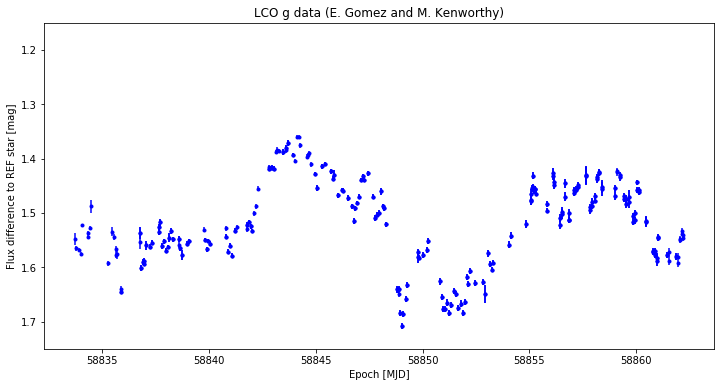

In [5]:
%matplotlib inline
f = plt.figure(figsize=(12,6))
ax = f.add_subplot(111)

ax.ticklabel_format(useOffset=False)

plt.errorbar(t['MJD'], t['gmag'],yerr=t['gmag_err'], fmt='.',color='blue')
plt.ylim(1.75,1.15)
plt.xlabel('Epoch [MJD]')
plt.ylabel('Flux difference to REF star [mag]')
plt.title('LCO g data (E. Gomez and M. Kenworthy)')


In [6]:
from astropy.io import ascii

t.write('lco.ecsv', format='ascii.ecsv', overwrite=True)